In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [264]:
dataset = 3

In [265]:
# Experiments path
#@path = "C:\\Users\\luiz_\\Jupyter\\Quantifiers\\experiments\\"
path = "C:\\Users\\Luiz Fernando\\JupyterFiles\\Quantifier-project\\Quantifiers\\experiments\\"
datas = []
datas.append(pd.read_csv(f"{path}exp0.csv"))
datas.append(pd.read_csv(f"{path}exp1.csv"))
datas.append(pd.read_csv(f"{path}exp2.csv"))
df = pd.DataFrame(columns=["df","sample","Test_size",'alpha',"actual_prop","pred_prop","abs_error",
                           "quantifier"])

for i, d in enumerate(datas):
    d['df'] = i+1
    df = pd.concat([d, df])
    
df = df.drop(['actual_prop', 'pred_prop'], axis='columns')
df

,sample,Test_size,alpha,abs_error,quantifier,df
0,1,10,0.2,0.20,CC,3
1,1,10,0.2,0.20,ACC,3
2,1,10,0.2,0.02,PCC,3
3,1,10,0.2,0.20,PACC,3
4,1,10,0.2,0.34,X,3
...,...,...,...,...,...,...
4450,3,98,0.8,0.20,T50,1
4451,3,98,0.8,0.02,MS,1
4452,3,98,0.8,0.00,HDy,1
4453,3,98,0.8,0.02,DyS,1


In [266]:
gp = df.groupby(["Test_size", "quantifier", "df"]).median(numeric_only=True)
gp["abs_error"] = gp["abs_error"].round(2)
gp

alpha  abs_error
Test_size quantifier df                  
10        ACC        1     0.5       0.01
                     2     0.5       0.01
                     3     0.5       0.20
          CC         1     0.5       0.00
                     2     0.5       0.00
...                        ...        ...
98        T50        2     0.5       0.02
                     3     0.5       0.11
          X          1     0.5       0.01
                     2     0.5       0.01
                     3     0.5       0.18

[1485 rows x 2 columns]

In [267]:
gp['index'] = gp.index
gp = gp.reset_index(drop=True)
gp

,alpha,abs_error,index
0,0.5,0.01,"(10, ACC, 1)"
1,0.5,0.01,"(10, ACC, 2)"
2,0.5,0.20,"(10, ACC, 3)"
3,0.5,0.00,"(10, CC, 1)"
4,0.5,0.00,"(10, CC, 2)"
...,...,...,...
1480,0.5,0.02,"(98, T50, 2)"
1481,0.5,0.11,"(98, T50, 3)"
1482,0.5,0.01,"(98, X, 1)"
1483,0.5,0.01,"(98, X, 2)"


In [268]:
gp[["Test_size", "quantifier", "df"]] = gp['index'].map(
    lambda x: str(x)[1:-1]).str.split(pat=",", expand=True)
gp = gp.drop(["index", "alpha"], axis="columns")
gp["quantifier"] = gp["quantifier"].str.strip().map(lambda x: str(x)[1:-1])
gp

,abs_error,Test_size,quantifier,df
0,0.01,10,ACC,1
1,0.01,10,ACC,2
2,0.20,10,ACC,3
3,0.00,10,CC,1
4,0.00,10,CC,2
...,...,...,...,...
1480,0.02,98,T50,2
1481,0.11,98,T50,3
1482,0.01,98,X,1
1483,0.01,98,X,2


In [269]:
gp[["Test_size", "df"]] = gp[["Test_size", "df"]].apply(pd.to_numeric)
gp.dtypes

abs_error     float64
Test_size       int64
quantifier     object
df              int64
dtype: object

In [270]:
gp = gp.groupby(["df", "quantifier"])
gp.get_group((dataset, "CC"))

,abs_error,Test_size,quantifier,df
5,0.40,10,CC,3
38,0.33,12,CC,3
71,0.43,14,CC,3
104,0.38,16,CC,3
137,0.50,18,CC,3
170,0.50,20,CC,3
203,0.50,22,CC,3
236,0.38,24,CC,3
269,0.42,26,CC,3
302,0.43,28,CC,3


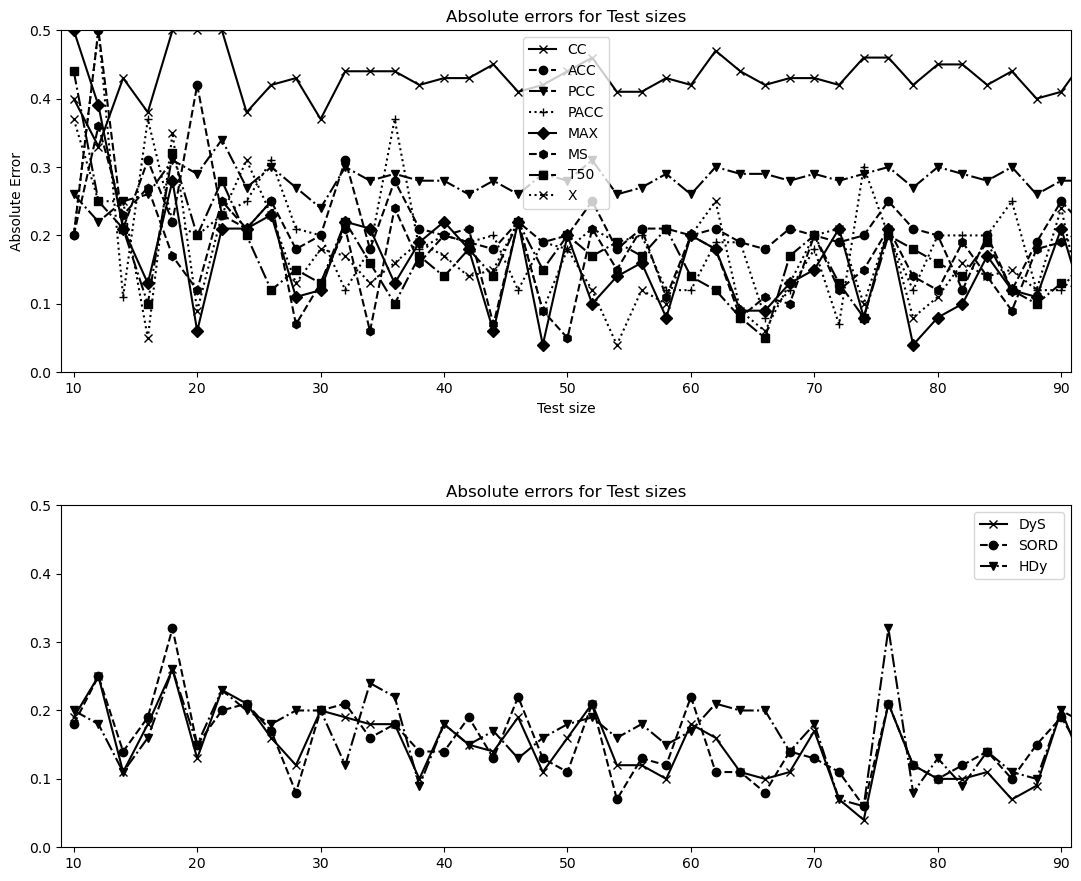

In [271]:
qtfs = ['CC', 'ACC', 'PCC', 'PACC', 'MAX', 'MS', 'T50', 'X']
X = list(gp.get_group((dataset, "CC"))["Test_size"].reset_index(drop=True))
markers = ['x', 'o', 'v', '+', 'D', 'h', 's', 'x', '+', 'h', 'D']
lines=['-', '--', '-.', ':'] * 3

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(X, gp.get_group((dataset, qtf))["abs_error"], label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(X, gp.get_group((dataset, qtf))["abs_error"], label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for Test sizes')
ax1.legend()
ax1.set_xlim([9, 90.8])
ax1.set_ylim([0, 0.5])

ax2.set_title('Absolute errors for Test sizes')
ax2.legend()
ax2.set_xlim([9, 90.8])
ax2.set_ylim([0, 0.5])

ax1.set_xlabel('Test size')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

In [272]:
quantifiers = ['CC', 'ACC', 'PCC', 'PACC', 'MAX', 'MS', 'T50', 'X','DyS', 'SORD', 'HDy']

In [273]:
abs_err = []
for i in quantifiers:
    abs_err.append(list(gp.get_group((dataset, i))["abs_error"].reset_index(drop=True)))
abs_err

[[0.4,
  0.33,
  0.43,
  0.38,
  0.5,
  0.5,
  0.5,
  0.38,
  0.42,
  0.43,
  0.37,
  0.44,
  0.44,
  0.44,
  0.42,
  0.43,
  0.43,
  0.45,
  0.41,
  0.42,
  0.44,
  0.46,
  0.41,
  0.41,
  0.43,
  0.42,
  0.47,
  0.44,
  0.42,
  0.43,
  0.43,
  0.42,
  0.46,
  0.46,
  0.42,
  0.45,
  0.45,
  0.42,
  0.44,
  0.4,
  0.41,
  0.46,
  0.43,
  0.41,
  0.43],
 [0.2,
  0.5,
  0.21,
  0.31,
  0.22,
  0.42,
  0.23,
  0.21,
  0.25,
  0.18,
  0.2,
  0.31,
  0.18,
  0.28,
  0.21,
  0.2,
  0.19,
  0.18,
  0.22,
  0.19,
  0.2,
  0.25,
  0.18,
  0.21,
  0.21,
  0.2,
  0.21,
  0.19,
  0.18,
  0.21,
  0.2,
  0.19,
  0.2,
  0.25,
  0.21,
  0.2,
  0.12,
  0.2,
  0.12,
  0.19,
  0.25,
  0.21,
  0.12,
  0.29,
  0.18],
 [0.26,
  0.22,
  0.25,
  0.26,
  0.31,
  0.29,
  0.34,
  0.27,
  0.3,
  0.27,
  0.24,
  0.3,
  0.28,
  0.29,
  0.28,
  0.28,
  0.26,
  0.28,
  0.26,
  0.29,
  0.28,
  0.31,
  0.26,
  0.27,
  0.29,
  0.26,
  0.3,
  0.29,
  0.29,
  0.28,
  0.29,
  0.28,
  0.29,
  0.3,
  0.27,
  0.3,
  0.29,
  

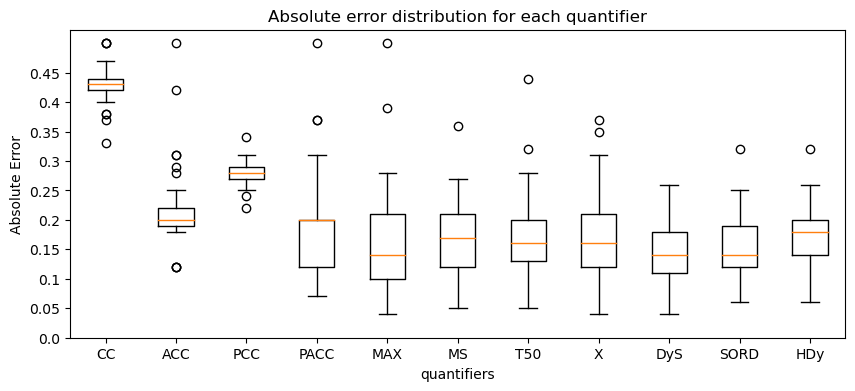

In [274]:
plt.figure(figsize=(10, 4))

plt.boxplot(abs_err)
ticks = np.around(np.arange(0, 0.5, 0.05), 2)

plt.xticks(range(1, 12), quantifiers)
plt.title("Absolute error distribution for each quantifier")
plt.xlabel("quantifiers")
plt.ylabel("Absolute Error")
plt.yticks(ticks, labels=ticks)

plt.show()

In [275]:
dataset = list(np.sort(df["df"].unique()))
df_mean_err = pd.DataFrame(columns=[quantifiers], index=dataset)
for d in dataset:
    for i, qtf in enumerate(quantifiers):
        df_mean_err.iloc[d-1, i] = round(gp.get_group((d, qtf))["abs_error"].reset_index(drop=True).mean(
            numeric_only=True), 3)
df_mean_err

,CC,ACC,PCC,PACC,MAX,MS,T50,X,DyS,SORD,HDy
1,0.004,0.01,0.017,0.024,0.011,0.01,0.189,0.009,0.009,0.009,0.013
2,0.006,0.009,0.015,0.011,0.01,0.01,0.026,0.009,0.011,0.01,0.017
3,0.43,0.219,0.281,0.196,0.16,0.166,0.168,0.165,0.145,0.153,0.167


In [276]:
df_mean_err.rank(axis=1)

,CC,ACC,PCC,PACC,MAX,MS,T50,X,DyS,SORD,HDy
1,1.0,5.5,9.0,10.0,7.0,5.5,11.0,3.0,3.0,3.0,8.0
2,1.0,2.5,9.0,7.5,5.0,5.0,11.0,2.5,7.5,5.0,10.0
3,11.0,9.0,10.0,8.0,3.0,5.0,7.0,4.0,1.0,2.0,6.0


In [277]:
df_mean_err = df_mean_err.rank(axis=1)
df_mean_err

,CC,ACC,PCC,PACC,MAX,MS,T50,X,DyS,SORD,HDy
1,1.0,5.5,9.0,10.0,7.0,5.5,11.0,3.0,3.0,3.0,8.0
2,1.0,2.5,9.0,7.5,5.0,5.0,11.0,2.5,7.5,5.0,10.0
3,11.0,9.0,10.0,8.0,3.0,5.0,7.0,4.0,1.0,2.0,6.0


In [278]:
df_final = df_mean_err

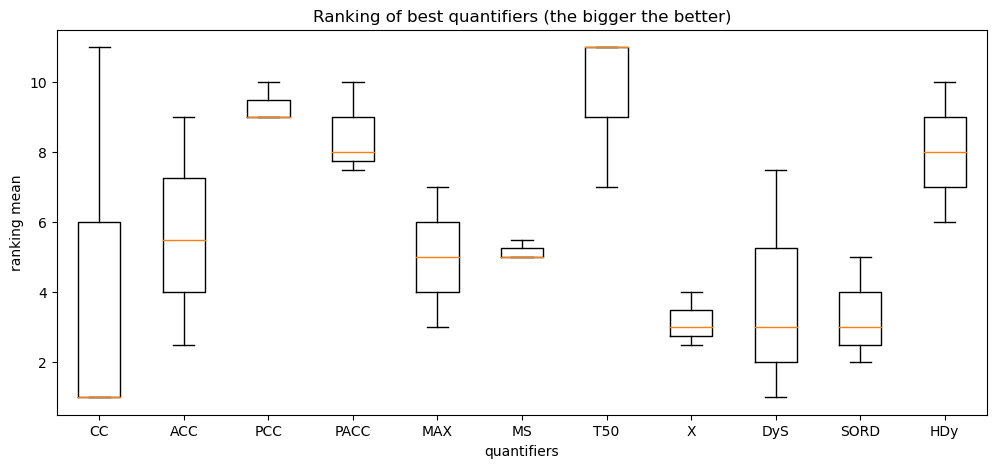

In [279]:
plt.figure(figsize=(12, 5))
plt.boxplot(df_mean_err)
plt.xticks(range(1, 12), quantifiers)
plt.xlabel("quantifiers")
plt.ylabel("ranking mean")
plt.title("Ranking of best quantifiers (the bigger the better)")
plt.show()